In [1]:
import os
from PIL import Image
import cv2
import numpy as np
import matplotlib.pyplot as plt
from glob import glob
import random
import time
from skimage.metrics import structural_similarity, mean_squared_error
cells_path = 'cl'
background_path = 'bg'
for filename in os.listdir(background_path):
    img=Image.open('bg/' + filename)
    rimg = img.resize((32,32))
    rimg.save('bg/' + filename)
for filename in os.listdir(cells_path):
    img=Image.open('cl/' + filename)
    rimg = img.resize((64,64))
    rimg.save('cl/' + filename)
import cv2
import numpy as np
import random
import os
from glob import glob
import matplotlib.pyplot as plt

def bg_create():
    bg = np.zeros((512,512,3), dtype=np.uint8)
    patch = glob(os.path.join('bg/',"*.png"))
    for i in range(512//32):
        for j in range(512//32):
            p = cv2.imread(random.choice(patch),cv2.IMREAD_GRAYSCALE)
            p = cv2.cvtColor(p, cv2.COLOR_GRAY2BGR)
            bg[i*32:(i+1)*32,j*32:(j+1)*32] = p
    return bg
def cell_create(bg):
    cells = glob(os.path.join('cl/',"*.png"))
    cell = cv2.imread(random.choice(cells),cv2.IMREAD_GRAYSCALE)
    cell = cv2.cvtColor(cell, cv2.COLOR_GRAY2BGR)
    mask = 255 * np.ones(cell.shape, dtype=np.uint8)
    place = (random.randint(0, 512 - 64) + 64 // 2, random.randint(0, 512 - 64) + 64 // 2)
    img = cv2.seamlessClone(cell,bg,mask,place,cv2.NORMAL_CLONE)
    return img
def gauss(img):
    mean = 0
    stddev = 100
    noise_gauss = np.zeros(img.shape, np.uint8)
    cv2.randn(noise_gauss, mean, stddev)
    img = cv2.add(img,noise_gauss)
    return img
def const(img):
    img = cv2.add(img, 10)
    return img
def generate():
    while 1:
        img = bg_create()
        for i in range(random.randint(1,10)):
            img = cell_create(img)
        img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
        gs = gauss(img)
        ct = const(img)
        yield img, gs, ct
gen = generate() 
img, gs, ct = next(gen)

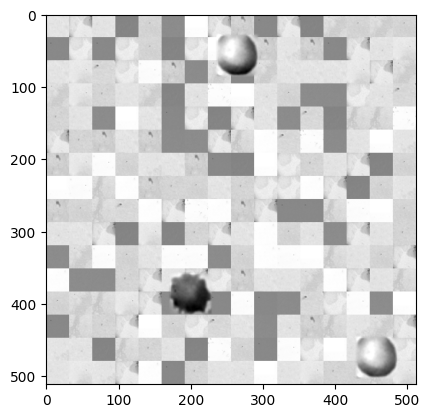

In [3]:
plt.imshow(img, cmap = 'gray')

In [4]:
cv2.imwrite(f'img1.png', img)
cv2.imwrite(f'img1.jpg', img)
cv2.imwrite(f'img1.bmp', img)

True

In [57]:
from skimage.metrics import structural_similarity, mean_squared_error

loaded_image = cv2.imread(f'img1.png')
loaded_image = cv2.cvtColor(loaded_image, cv2.COLOR_BGR2GRAY)

mse_value = mean_squared_error(img, loaded_image)
ssim, diff = structural_similarity(img,  loaded_image, full=True)
print(f"png: MSE: {mse_value}, SSIM: {ssim}")

loaded_image = cv2.imread(f'img1.jpg')
loaded_image = cv2.cvtColor(loaded_image, cv2.COLOR_BGR2GRAY)

mse_value = mean_squared_error(img, loaded_image)
ssim, diff = structural_similarity(img,  loaded_image, full=True)
print(f"jpg: MSE: {mse_value}, SSIM: {ssim}")

loaded_image = cv2.imread(f'img1.bmp')
loaded_image = cv2.cvtColor(loaded_image, cv2.COLOR_BGR2GRAY)

mse_value = mean_squared_error(img, loaded_image)
ssim, diff = structural_similarity(img,  loaded_image, full=True)
print(f"bmp: MSE: {mse_value}, SSIM: {ssim}")

png: MSE: 0.0, SSIM: 1.0
jpg: MSE: 1.024810791015625, SSIM: 0.9897210451601615
bmp: MSE: 0.0, SSIM: 1.0


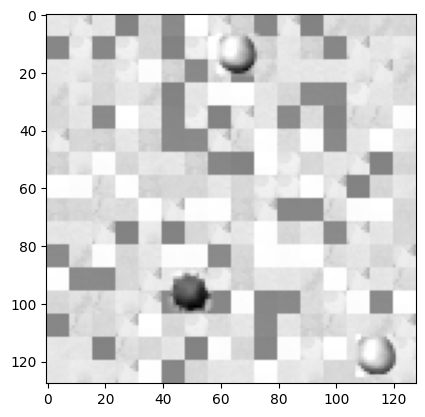

In [59]:
h, w = img.shape
new_h = h // 4
new_w = w // 4
downsampled1 = np.zeros((new_h, new_w), dtype=np.uint8)
for i in range(new_h):
    for j in range(new_w):
         downsampled1[i, j] = np.max(img[i*4:(i+1)*4, j*4:(j+1)*4])
plt.imshow(downsampled1, cmap = 'gray')

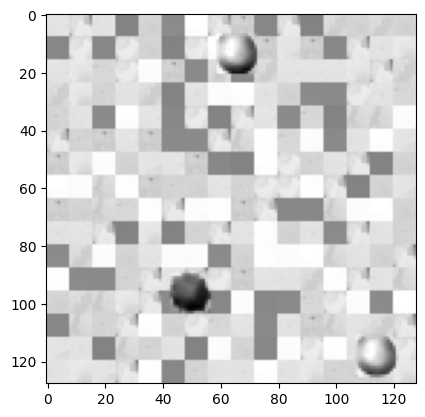

In [60]:
h, w = img.shape
new_h = h // 4
new_w = w // 4
downsampled2 = np.zeros((new_h, new_w), dtype=np.uint8)
for i in range(new_h):
    for j in range(new_w):
         downsampled2[i, j] = np.median(img[i*4:(i+1)*4, j*4:(j+1)*4])
plt.imshow(downsampled2, cmap = 'gray')

MSE: 87.43982696533203, SSIM: 0.8335961811943652


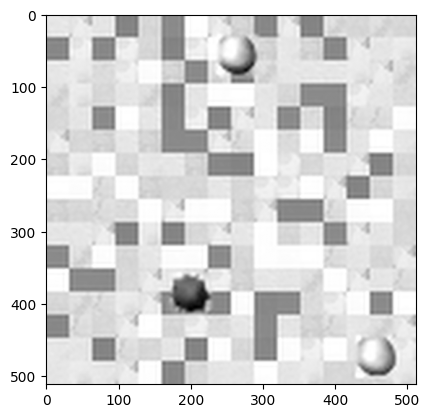

In [71]:
h, w = downsampled1.shape
new_h = int(h * 4)
new_w = int(w * 4)
restored_image = cv2.resize(downsampled1, (new_w, new_h), interpolation=cv2.INTER_LANCZOS4)
mse = mean_squared_error(img, restored_image)
ssim, _ = structural_similarity(img, restored_image, full=True)
print(f"MSE: {mse}, SSIM: {ssim}")
plt.imshow(restored_image, cmap = 'gray')

MSE: 47.50291442871094, SSIM: 0.8569889426096527


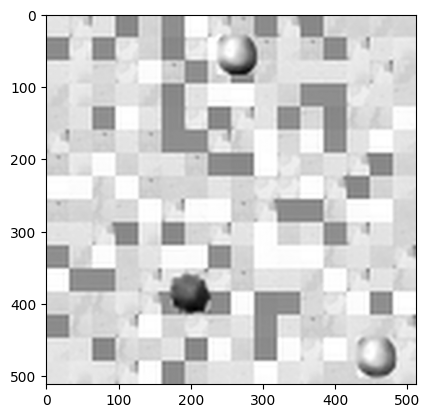

In [72]:
h, w = downsampled2.shape
new_h = int(h * 4)
new_w = int(w * 4)
restored_image = cv2.resize(downsampled2, (new_w, new_h), interpolation=cv2.INTER_LANCZOS4)
mse = mean_squared_error(img, restored_image)
ssim, _ = structural_similarity(img, restored_image, full=True)
print(f"MSE: {mse}, SSIM: {ssim}")
plt.imshow(restored_image, cmap = 'gray')